# Namma Caru Expansion Project

- "Namma Caru" is a [ fictitious ] car manufacturing company
building cars in India since 1990. It is very famous in India for its
high-end sports sedan named, "Rajdutu" and its compact version
"AadhiCaru"

- The new your generation of leaders of "Namma Caru", have been
ambitious in coming up with the Electronic versions of these two
premium cars, viz., "e-Rajdutu" and "e-AadhiCaru". They want to
expand their market and establish themselves in upcoming
markets of USA.

- They have approached you to do some Market Research and help
them take an informed decision for their expansion plans.#

- They want to understand the demographics of USA, in order to
help them figure out their target audience.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
Cardf = pd.read_csv("https://raw.githubusercontent.com/Manju410/MLPractice/main/data/phpMawTba.csv")

In [ ]:
cols = Cardf.columns
cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [ ]:
Cardf.shape

(48842, 15)

In [ ]:
Cardf["age"].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

In [ ]:
Cardf["workclass"].unique()

array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
Cardf.loc[:,'workclass'] = Cardf['workclass'].str.replace('?','No-Work')

In [ ]:
Cardf["workclass"].unique()

array([' Private', ' Local-gov', ' No-Work', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
Cardf['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', ' ?',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [ ]:
Cardf.loc[:,'occupation'] = Cardf['occupation'].str.replace('?','Family-Occupation')

In [ ]:
Cardf['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Family-Occupation', ' Other-service', ' Prof-specialty',
       ' Craft-repair', ' Adm-clerical', ' Exec-managerial',
       ' Tech-support', ' Sales', ' Priv-house-serv', ' Transport-moving',
       ' Handlers-cleaners', ' Armed-Forces'], dtype=object)

Workclass and occupation column contain non valuable data ie(?) - so replaced those data with not working and family occupation becuase there income is calculated.

In [ ]:
Cardf['native-country'].unique()

array([' United-States', ' ?', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France', ' Holand-Netherlands'],
      dtype=object)

In [ ]:
Cardf.loc[:,'native-country'] = Cardf['native-country'].str.replace(
                                    '?',
                                    'Other-country'
                                    )

In [ ]:
Cardf['native-country'].unique()

array([' United-States', ' Other-country', ' Peru', ' Guatemala',
       ' Mexico', ' Dominican-Republic', ' Ireland', ' Germany',
       ' Philippines', ' Thailand', ' Haiti', ' El-Salvador',
       ' Puerto-Rico', ' Vietnam', ' South', ' Columbia', ' Japan',
       ' India', ' Cambodia', ' Poland', ' Laos', ' England', ' Cuba',
       ' Taiwan', ' Italy', ' Canada', ' Portugal', ' China',
       ' Nicaragua', ' Honduras', ' Iran', ' Scotland', ' Jamaica',
       ' Ecuador', ' Yugoslavia', ' Hungary', ' Hong', ' Greece',
       ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' France',
       ' Holand-Netherlands'], dtype=object)

Native-Country column has '?' values: Replace those cells with other country.

In [ ]:
def CalcAge(x):
    if x<=20: return 'Teens'
    elif x>=70: return 'SuperSeniors'
    elif x>=60: return 'Seniors'
    else: return 'adults'

In [ ]:
#Cardf['AgeGroup']=[CalcAge(x) for x in Cardf['age']]
Cardf['AgeGroup'] = Cardf['age'].apply(lambda x: CalcAge(x))

In [ ]:
Cardf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,adults
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,adults
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,adults
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,adults
4,18,No-Work,103497,Some-college,10,Never-married,Family-Occupation,Own-child,White,Female,0,0,30,United-States,<=50K,Teens


In [ ]:
workclassunique = [' State-gov',' Federal-gov',' Local-gov']

In [ ]:
def funreplace(x):
  if x in workclassunique:
    return 'Government Employees'
  else: 
    return x

In [ ]:
Cardf['workclass'] = Cardf['workclass'].apply(funreplace)
#Cardf["workclass"].replace({" Local-gov": "Government Employees", " State-gov": "Government Employees"," Federal-gov": "Government Employees"}, inplace=True)

In [ ]:
Cardf['workclass'].unique()

array([' Private', 'Government Employees', ' No-Work',
       ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
Cardf['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [ ]:
educationunique = [' 11th',' 7th-8th',' 9th',' 1st-4th',' 5th-6th',' 10th',' 12th',' HS-grad',' Preschool']
def funreplaceedu(x):
  if x in educationunique:
    return 'Elementary Schooling'
  else: return x

Cardf['education'] = Cardf['education'].apply(funreplaceedu)

In [ ]:
Cardf['education'].unique()

array(['Elementary Schooling', ' Assoc-acdm', ' Some-college',
       ' Prof-school', ' Bachelors', ' Masters', ' Doctorate',
       ' Assoc-voc'], dtype=object)

In [ ]:
Cardf['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [ ]:
maritalunique = [' Never-married',' Widowed',' Divorced']
def funreplacemarital(x):
  if x in maritalunique:
    return 'single'
  else: return 'married'

Cardf['marital-status'] = Cardf['marital-status'].apply(funreplacemarital)

In [ ]:
Cardf['marital-status'].unique()

array(['single', 'married'], dtype=object)

In [ ]:
Cardf['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
def funreplaceincome(x):
  if x ==' <=50K':
    return 'Low income'
  elif x== ' >50K':
    return 'High income'

Cardf['class'] = Cardf['class'].apply(funreplaceincome)

In [ ]:
Cardf['class'].unique()

array(['Low income', 'High income'], dtype=object)

In [ ]:
Cardf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
0,25,Private,226802,Elementary Schooling,7,single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Low income,adults
1,38,Private,89814,Elementary Schooling,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,Low income,adults
2,28,Government Employees,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,High income,adults
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,High income,adults
4,18,No-Work,103497,Some-college,10,single,Family-Occupation,Own-child,White,Female,0,0,30,United-States,Low income,Teens


#1. Are there more "Government" employees or "Private" employees in the population ?#

In [ ]:
FiveProf=[' Private', 'Government Employees']
Employeedf = Cardf[Cardf['workclass'].isin(FiveProf)]

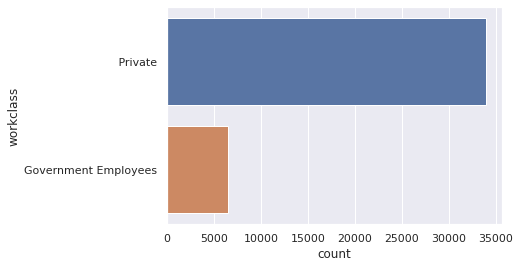

In [ ]:
sns.countplot(y='workclass',data=Employeedf)

 - There are more Private Employees in the population than government employees
 

#What is the gender distribution of the population ? [ What percentage of the population are males and females ? ]#

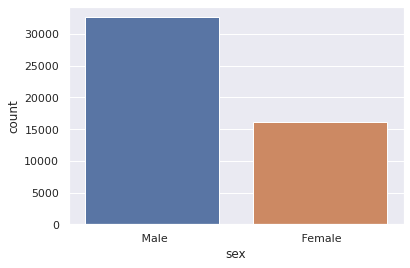

In [ ]:
sns.countplot(x='sex',data=Cardf)

# Gender Distribution
 - more than 30k males are covered around entire population
 - approx 15k females are present in entire population.
 - female counts are less than half of male counts

In [ ]:
Cardf["sex"].value_counts(normalize=True)

 Male      0.668482
 Female    0.331518
Name: sex, dtype: float64

- 66% of population are Males.
- 33% of population are Females.
- Female count is approx half of Male count.

#What are the top 3 education qualifications of the population ?

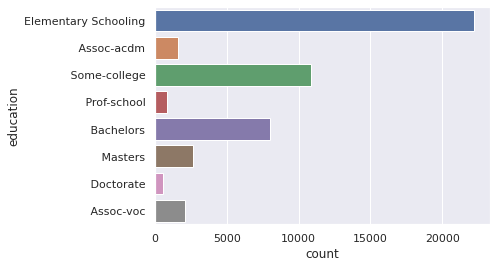

In [ ]:
sns.countplot(y='education',data=Cardf)

- Elementry schooling, some college and Bachlors education are the top 3 education qualifications in the entire population.

In [ ]:
counts=Cardf['education'].value_counts()

In [ ]:
SortedEducation = counts.sort_values(ascending=False)[:3]

In [ ]:
Educationdf = Cardf[Cardf['education'].isin(SortedEducation.keys())]

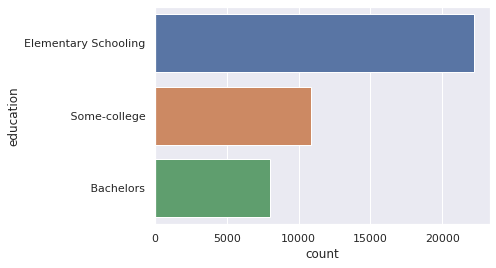

In [ ]:
sns.countplot(y='education',data=Educationdf)

- Some college - 10878
- Bachelores- 8025 
- Elementary schooling- 2657
Above 3 are the top 3 Education qualifications in the entire population.

#What is the average time spent in a week in doing work ?#

In [ ]:
Cardf['hours-per-week'].mean()

40.422382375824085

#What amount of time is spent at work, by the middle 50% of the work force ?

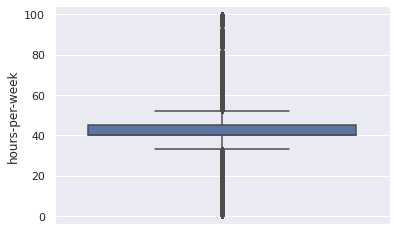

In [ ]:
sns.boxplot(y='hours-per-week',data=Cardf)

In [ ]:
Cardf['hours-per-week'].quantile([0.25,0.75])

0.25    40.0
0.75    45.0
Name: hours-per-week, dtype: float64

- 40-45 hours time spent by middle 50% of population in a week.

#What are the top 10 native countries of the Immigrants in the working population ? [ Immigrants are people who do not originally belong to USA ]#

In [ ]:
Cardf['native-country'].unique()

array([' United-States', ' Other-country', ' Peru', ' Guatemala',
       ' Mexico', ' Dominican-Republic', ' Ireland', ' Germany',
       ' Philippines', ' Thailand', ' Haiti', ' El-Salvador',
       ' Puerto-Rico', ' Vietnam', ' South', ' Columbia', ' Japan',
       ' India', ' Cambodia', ' Poland', ' Laos', ' England', ' Cuba',
       ' Taiwan', ' Italy', ' Canada', ' Portugal', ' China',
       ' Nicaragua', ' Honduras', ' Iran', ' Scotland', ' Jamaica',
       ' Ecuador', ' Yugoslavia', ' Hungary', ' Hong', ' Greece',
       ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' France',
       ' Holand-Netherlands'], dtype=object)

In [ ]:
Nativedf=Cardf[Cardf['native-country']!=" United-States"]

In [ ]:
Nativedf['native-country'].unique()

array([' Other-country', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France', ' Holand-Netherlands'],
      dtype=object)

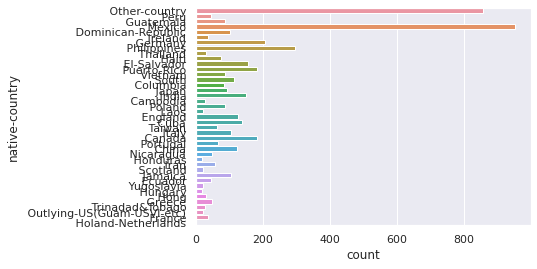

In [ ]:

sns.countplot(y='native-country',data=Nativedf)

In [ ]:
nativecount = Nativedf['native-country'].value_counts()

In [ ]:
SortedNative = nativecount.sort_values(ascending=False)[:10]

In [ ]:
Nativedf = Cardf[Cardf['native-country'].isin(SortedNative.keys())]

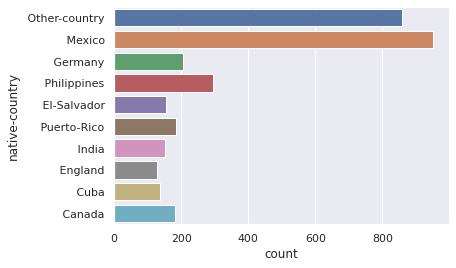

In [ ]:
sns.countplot(y='native-country',data=Nativedf)

- above are the top 10 native countries of the immgrants in the working populations.

#What is the age group of the workaholics ? [ The ones who work more than the normal, also called as Outliers ]#

In [ ]:
q1,q3 = Cardf['hours-per-week'].quantile([0.25,0.75])

In [ ]:
q4 = (q3+(1.5*(q3-q1)))

In [ ]:
q0 = (q1-(1.5*(q3-q1)))

In [ ]:
q0

32.5

In [ ]:
q1

40.0

In [ ]:
q3

45.0

In [ ]:
q4

52.5

In [ ]:
Newdf = Cardf[(Cardf['hours-per-week'] >= q4)]

In [ ]:
Newdf[['age','AgeGroup','hours-per-week']]

,age,AgeGroup,hours-per-week
25,45,adults,90
27,23,adults,54
29,32,adults,60
53,22,adults,60
54,38,adults,54
...,...,...,...
48811,35,adults,55
48812,30,adults,99
48813,34,adults,60
48817,34,adults,55


In [ ]:
Workholics = Newdf['AgeGroup'].unique()

In [ ]:
Workholics

array(['adults', 'Seniors', 'Teens', 'SuperSeniors'], dtype=object)

above Workholics list contains age group of workholics which is identified as outliers.

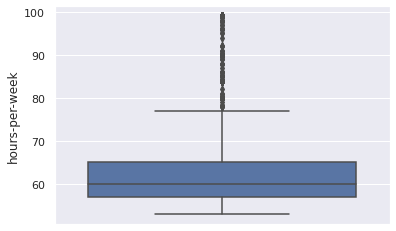

In [ ]:
sns.boxplot(y='hours-per-week',data=Newdf)

#What are the occupations of the top 80% of High income individuals ?#

In [ ]:
NewCardf = Cardf[(Cardf['class']=='High income')]

In [ ]:
rows, cols = NewCardf.shape

In [ ]:
Eighty = (rows*80)/100

In [ ]:
Eighty = round(Eighty)

In [ ]:
HighIncomeEighty = NewCardf[:Eighty]
HighIncomeEighty.shape

(9350, 16)

In [ ]:
HighIncomeEighty.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
2,28,Government Employees,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,High income,adults
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,High income,adults
7,63,Self-emp-not-inc,104626,Prof-school,15,married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,High income,Seniors
10,65,Private,184454,Elementary Schooling,9,married,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,High income,Seniors
14,48,Private,279724,Elementary Schooling,9,married,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,High income,adults


In [ ]:
NewCardf.quantile(q=0.8)

age                   53.0
fnlwgt            256362.0
education-num         14.0
capital-gain        4386.0
capital-loss           0.0
hours-per-week        50.0
Name: 0.8, dtype: float64

In [ ]:
HighIncomeEighty['occupation'].unique()

array([' Protective-serv', ' Machine-op-inspct', ' Prof-specialty',
       ' Exec-managerial', ' Tech-support', ' Craft-repair', ' Sales',
       ' Other-service', ' Family-Occupation', ' Transport-moving',
       ' Adm-clerical', ' Handlers-cleaners', ' Farming-fishing',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

#Which of these occupations have a higher percentage of individuals with High Income compared to those having Low Income?

In [ ]:
HighIncomeEighty['occupation'].unique()

array([' Protective-serv', ' Machine-op-inspct', ' Prof-specialty',
       ' Exec-managerial', ' Tech-support', ' Craft-repair', ' Sales',
       ' Other-service', ' Family-Occupation', ' Transport-moving',
       ' Adm-clerical', ' Handlers-cleaners', ' Farming-fishing',
       ' Priv-house-serv', ' Armed-Forces'], dtype=object)

In [ ]:
HighIncomeOccupation = HighIncomeEighty['occupation'].value_counts()

In [ ]:
HighIncomeOccupation[:7]

 Exec-managerial     2302
 Prof-specialty      2236
 Sales               1170
 Craft-repair        1106
 Adm-clerical         626
 Transport-moving     397
 Tech-support         338
Name: occupation, dtype: int64

Exec-managerial,Prof-specialty,sales,craft-repair, adm-clerical, Transport-moving, Tech-support occupation have highest income of individuals approximatly.


#What is the distribution of their ages

In [ ]:
HighIncomeEighty[['age','occupation']]

,age,occupation
2,28,Protective-serv
3,44,Machine-op-inspct
7,63,Prof-specialty
10,65,Machine-op-inspct
14,48,Machine-op-inspct
...,...,...
39336,35,Prof-specialty
39342,45,Tech-support
39359,50,Prof-specialty
39361,46,Exec-managerial


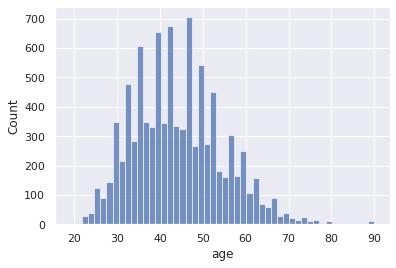

In [ ]:
sns.histplot(x='age',data=HighIncomeEighty)

In [ ]:
HighIncomeEighty['age'].quantile([0.25,0.75])

0.25    36.0
0.75    51.0
Name: age, dtype: float64

- it has slighly right skewed normal distribution.

> Indented block



#What is the gender distribution for these individuals

In [ ]:
HighIncomeEighty[['sex','occupation']]

,sex,occupation
2,Male,Protective-serv
3,Male,Machine-op-inspct
7,Male,Prof-specialty
10,Male,Machine-op-inspct
14,Male,Machine-op-inspct
...,...,...
39336,Male,Prof-specialty
39342,Male,Tech-support
39359,Male,Prof-specialty
39361,Male,Exec-managerial


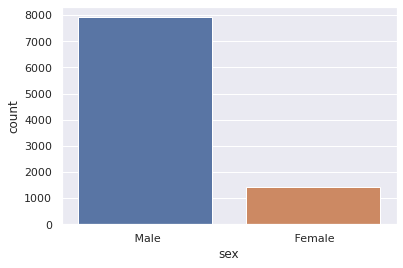

In [ ]:
sns.countplot(x='sex',data=HighIncomeEighty)

- male counts are more than female counts in the gender distribution of pro- specialty

#What is the distribution of their marital status

In [ ]:
HighIncomeEighty[['marital-status','occupation']]

,marital-status,occupation
2,married,Protective-serv
3,married,Machine-op-inspct
7,married,Prof-specialty
10,married,Machine-op-inspct
14,married,Machine-op-inspct
...,...,...
39336,married,Prof-specialty
39342,married,Tech-support
39359,married,Prof-specialty
39361,married,Exec-managerial


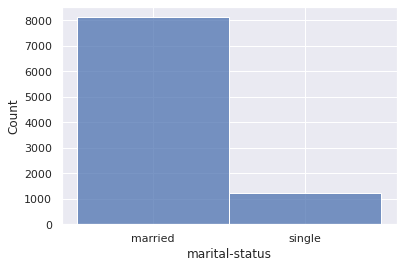

In [ ]:
sns.histplot(x='marital-status',data=HighIncomeEighty)

- there are married persons are more in this occupation.

#What is their average work hours

In [ ]:
HighIncomeEighty['hours-per-week'].mean()

45.35689839572193

#Are there workaholics among these individuals

In [ ]:
q1,q3=HighIncomeEighty['hours-per-week'].quantile([0.25,0.75])

In [ ]:
q4 = (q3+(1.5*(q3-q1)))
q4

65.0

In [ ]:
q0 = (q1-(1.5*(q3-q1)))


In [ ]:
Newdfoutlier = HighIncomeEighty[ (HighIncomeEighty['hours-per-week'] >= q4)]

In [ ]:
Newdfoutlier.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
25,45,Self-emp-not-inc,432824,Elementary Schooling,9,married,Craft-repair,Husband,White,Male,7298,0,90,United-States,High income,adults
248,47,Private,212944,Elementary Schooling,9,married,Transport-moving,Husband,White,Male,0,0,70,United-States,High income,adults
354,32,Private,224462,Elementary Schooling,9,married,Transport-moving,Husband,White,Male,0,0,84,United-States,High income,adults
357,50,Self-emp-not-inc,165001,Prof-school,15,married,Prof-specialty,Husband,White,Male,99999,0,80,United-States,High income,adults
384,29,Private,211208,Elementary Schooling,7,married,Transport-moving,Husband,White,Male,0,0,99,United-States,High income,adults


#If so, then what do they work as
#What are their ages

In [ ]:
Newdfoutlier[['age','occupation']]

,age,occupation
25,45,Craft-repair
248,47,Transport-moving
354,32,Transport-moving
357,50,Prof-specialty
384,29,Transport-moving
...,...,...
38702,31,Craft-repair
38861,55,Transport-moving
39001,39,Sales
39250,44,Prof-specialty


In [ ]:
Newdfoutlier['occupation'].unique()

array([' Craft-repair', ' Transport-moving', ' Prof-specialty',
       ' Exec-managerial', ' Protective-serv', ' Farming-fishing',
       ' Sales', ' Other-service', ' Adm-clerical', ' Family-Occupation',
       ' Tech-support', ' Handlers-cleaners', ' Machine-op-inspct'],
      dtype=object)

In [ ]:
Newdfoutlier['age'].unique()

array([45, 47, 32, 50, 29, 37, 35, 58, 44, 49, 60, 30, 33, 55, 43, 56, 48,
       59, 53, 39, 46, 36, 42, 40, 57, 52, 63, 66, 64, 31, 41, 38, 51, 26,
       62, 34, 27, 54, 28, 25, 70, 68, 71, 23, 24, 67, 90, 22, 73, 69, 65])

#Are there more married people among them

In [ ]:
Newdfoutlier['marital-status'].head()

25     married
248    married
354    married
357    married
384    married
Name: marital-status, dtype: object

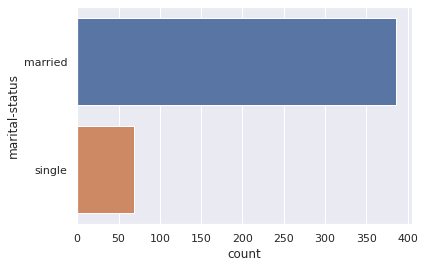

In [ ]:
sns.countplot(y='marital-status',data=Newdfoutlier)

- ther are more married people in this outlier dataset

#Based on the above, what would you recommend the Marketing Team for the following points ?#

#What should be the typical job played by the main characters in the advertisements ?

- Exec-managerial and Prof-specialty are typical job played by the main Characters.
- Theire age should be between 36-51.
- they should be married persons with Male gender.

#Should there be more men or women in the advertisements ?#

- There should be more men in the advertisements.

#Should the characters be shown to have a family ? 

- Yes, due to more number of married persons we should show to have a family.

#Should there be teenagers ?

No, From 36 - 51 age groups should be in advartisements.

#Should the advertisement be setup in the Home environment or the work place ?

- As there are more Married persons, we should setup advertisement in Home environment.

#Young Professionals [ Working Professionals below 30 years ]#

In [ ]:
YoungProdf = Cardf[Cardf['age']<=30]

In [ ]:
YoungProdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
0,25,Private,226802,Elementary Schooling,7,single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Low income,adults
2,28,Government Employees,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,High income,adults
4,18,No-Work,103497,Some-college,10,single,Family-Occupation,Own-child,White,Female,0,0,30,United-States,Low income,Teens
6,29,No-Work,227026,Elementary Schooling,9,single,Family-Occupation,Unmarried,Black,Male,0,0,40,United-States,Low income,adults
8,24,Private,369667,Some-college,10,single,Other-service,Unmarried,White,Female,0,0,40,United-States,Low income,adults


In [ ]:
YoungProdf.shape

(15793, 16)

#Female working professionals#

In [ ]:
Femaledf = Cardf[Cardf['sex']==' Female']

In [ ]:
Femaledf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
4,18,No-Work,103497,Some-college,10,single,Family-Occupation,Own-child,White,Female,0,0,30,United-States,Low income,Teens
8,24,Private,369667,Some-college,10,single,Other-service,Unmarried,White,Female,0,0,40,United-States,Low income,adults
12,26,Private,82091,Elementary Schooling,9,single,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,Low income,adults
17,43,Private,128354,Elementary Schooling,9,married,Adm-clerical,Wife,White,Female,0,0,30,United-States,Low income,adults
18,37,Private,60548,Elementary Schooling,9,single,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,Low income,adults


#Immigrants

In [ ]:
Immigrantdf = Cardf[Cardf['native-country'] != ' United-States']

In [ ]:
Immigrantdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
19,40,Private,85019,Doctorate,16,married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,Other-country,High income,adults
23,25,Private,220931,Bachelors,13,single,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,Low income,adults
37,22,Private,248446,Elementary Schooling,3,single,Priv-house-serv,Not-in-family,White,Male,0,0,50,Guatemala,Low income,adults
46,39,Private,290208,Elementary Schooling,4,married,Craft-repair,Husband,White,Male,0,0,40,Mexico,Low income,adults
54,38,Private,219446,Elementary Schooling,5,married,Exec-managerial,Not-in-family,White,Male,0,0,54,Mexico,Low income,adults


#Students#

In [ ]:
Cardf['education'].unique()

array(['Elementary Schooling', ' Assoc-acdm', ' Some-college',
       ' Prof-school', ' Bachelors', ' Masters', ' Doctorate',
       ' Assoc-voc'], dtype=object)

In [ ]:
studentdf = Cardf[Cardf['education'] == ' Some-college']

In [ ]:
studentdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,High income,adults
4,18,No-Work,103497,Some-college,10,single,Family-Occupation,Own-child,White,Female,0,0,30,United-States,Low income,Teens
8,24,Private,369667,Some-college,10,single,Other-service,Unmarried,White,Female,0,0,40,United-States,Low income,adults
16,20,Government Employees,444554,Some-college,10,single,Other-service,Own-child,White,Male,0,0,25,United-States,Low income,Teens
21,34,Private,238588,Some-college,10,single,Other-service,Own-child,Black,Female,0,0,35,United-States,Low income,adults


#What are the top 5 occupations of Young Professionals

In [ ]:
OccupationYoung = YoungProdf['occupation'].value_counts()

In [ ]:
TopFiveOcc = OccupationYoung.sort_values(ascending=False)[:5]

In [ ]:
TopFiveOcc.keys()

Index([' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Prof-specialty'],
      dtype='object')

- Above occupations are the top 5 occupation in the young professianals.

In [ ]:
FiveProf=[' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair', ' Prof-specialty']

In [ ]:
FiveTopOccupationdf = YoungProdf[YoungProdf['occupation'].isin(FiveProf)]


In [ ]:
FiveTopOccupationdf['native-country'].unique()

array([' United-States', ' Peru', ' Ireland', ' Germany', ' El-Salvador',
       ' Other-country', ' India', ' Haiti', ' England', ' Philippines',
       ' Nicaragua', ' China', ' Mexico', ' Puerto-Rico', ' Honduras',
       ' South', ' Thailand', ' Hong', ' Ecuador', ' Poland', ' Columbia',
       ' Scotland', ' Guatemala', ' Japan', ' Outlying-US(Guam-USVI-etc)',
       ' Vietnam', ' Taiwan', ' Dominican-Republic', ' Canada',
       ' Jamaica', ' Greece', ' Cuba', ' France', ' Italy', ' Yugoslavia',
       ' Portugal', ' Cambodia', ' Iran', ' Trinadad&Tobago', ' Hungary',
       ' Laos'], dtype=object)

In [ ]:
FiveTopOccupationdf['native-country'].value_counts()

 United-States                 8521
 Mexico                         197
 Other-country                  157
 Philippines                     53
 El-Salvador                     44
 Germany                         40
 India                           37
 Vietnam                         30
 Canada                          29
 Jamaica                         27
 Guatemala                       24
 South                           23
 Puerto-Rico                     23
 England                         19
 Japan                           17
 Taiwan                          17
 Dominican-Republic              17
 Haiti                           16
 Columbia                        15
 Nicaragua                       14
 China                           14
 Poland                          12
 Ecuador                         12
 Ireland                         11
 Italy                           10
 Cuba                            10
 Peru                            10
 Portugal                   

#What percentage of them belong to Low Income category as compared to the High Income category

In [ ]:
FiveTopOccupationdf['class'] == 'Low Income'

8        False
12       False
16       False
23       False
24       False
         ...  
48801    False
48808    False
48810    False
48818    False
48840    False
Name: class, Length: 9473, dtype: bool

In [ ]:
NewOccdf = FiveTopOccupationdf[:5]

In [ ]:
NewOccdf.value_counts(normalize=True)

age  workclass             fnlwgt  education             education-num  marital-status  occupation       relationship    race    sex      capital-gain  capital-loss  hours-per-week  native-country  class       AgeGroup
26    Private              82091   Elementary Schooling  9              single           Adm-clerical     Not-in-family   White   Female  0             0             39               United-States  Low income  adults      0.2
25    Private              220931   Bachelors            13             single           Prof-specialty   Not-in-family   White   Male    0             0             43               Peru           Low income  adults      0.2
                           205947   Bachelors            13             married          Prof-specialty   Husband         White   Male    0             0             40               United-States  Low income  adults      0.2
24    Private              369667   Some-college         10             single           Other-service 

#What is the gender distribution for these individuals

In [ ]:
FiveTopOccupationdf['sex'].unique()

array([' Female', ' Male'], dtype=object)

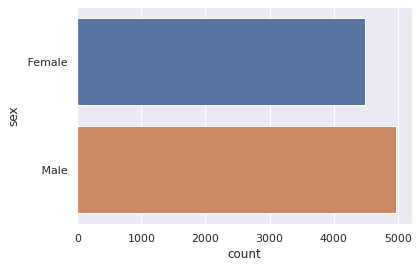

In [ ]:
sns.countplot(y='sex', data=FiveTopOccupationdf)

- there are more male counts are present in top 5 occupation in Young professianals.

#What is the distribution of their marital status

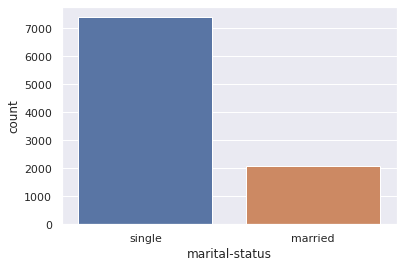

In [ ]:
sns.countplot(x='marital-status', data=FiveTopOccupationdf)

- More than 7000 peoples are single in the above top 5 occupation of Young professianals.

#Do they spend most of their time at work or at home

In [ ]:
FiveTopOccupationdf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
8,24,Private,369667,Some-college,10,single,Other-service,Unmarried,White,Female,0,0,40,United-States,Low income,adults
12,26,Private,82091,Elementary Schooling,9,single,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,Low income,adults
16,20,Government Employees,444554,Some-college,10,single,Other-service,Own-child,White,Male,0,0,25,United-States,Low income,Teens
23,25,Private,220931,Bachelors,13,single,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,Low income,adults
24,25,Private,205947,Bachelors,13,married,Prof-specialty,Husband,White,Male,0,0,40,United-States,Low income,adults


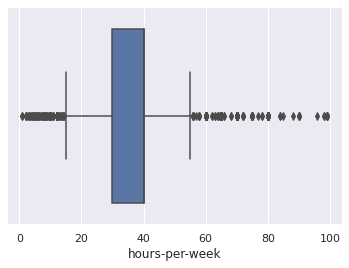

In [ ]:
sns.boxplot(x='hours-per-week', data=FiveTopOccupationdf)

In [ ]:
q1,q3 = FiveTopOccupationdf['hours-per-week'].quantile([0.25,0.75])

In [ ]:
q0 = (q1-(1.5*(q3-q1)))

In [ ]:
q4 = (q1+(1.5*(q3-q1)))

In [ ]:
WorkolicOccupation = FiveTopOccupationdf[FiveTopOccupationdf['hours-per-week'] <= q0]

In [ ]:
HomeOccupation = FiveTopOccupationdf[FiveTopOccupationdf['hours-per-week'] >= q4]

In [ ]:
WorkolicOccupation[['occupation','hours-per-week']]

,occupation,hours-per-week
86,Other-service,10
150,Other-service,14
210,Sales,12
242,Other-service,12
250,Sales,15
...,...,...
48421,Craft-repair,15
48468,Adm-clerical,12
48486,Other-service,15
48626,Other-service,12


In [ ]:
WorkolicOccupation['hours-per-week'].unique()

array([10, 14, 12, 15,  8,  3,  2,  7,  6,  5, 11,  4, 13,  1,  9])

In [ ]:
HomeOccupation['hours-per-week'].unique()

array([50, 60, 45, 55, 68, 48, 52, 56, 80, 70, 65, 53, 75, 96, 47, 46, 58,
       90, 54, 78, 62, 49, 64, 72, 57, 85, 51, 63, 66, 99, 84, 98, 88, 77])

- From above most of them are spent time at thier work as more number of workholics are present.

#Which of these occupations has the highest number of workaholics

In [ ]:
NewOccupationdf = FiveTopOccupationdf[ (FiveTopOccupationdf['hours-per-week'] >= q4)]

In [ ]:
NewOccupationdf['occupation'].value_counts()

 Sales             437
 Craft-repair      386
 Prof-specialty    381
 Adm-clerical      200
 Other-service     191
Name: occupation, dtype: int64

- Sales Department has more number of workholics

#What occupations are common among highest number of#
#Young Professionals#
#Female Professionals#
#Immigrants#

In [ ]:
YoungProdf['occupation'].unique()

array([' Machine-op-inspct', ' Protective-serv', ' Family-Occupation',
       ' Other-service', ' Adm-clerical', ' Prof-specialty', ' Sales',
       ' Exec-managerial', ' Priv-house-serv', ' Craft-repair',
       ' Farming-fishing', ' Handlers-cleaners', ' Armed-Forces',
       ' Transport-moving', ' Tech-support'], dtype=object)

In [ ]:
YoungProdf['occupation'].value_counts()

 Other-service        2241
 Adm-clerical         2150
 Sales                2083
 Craft-repair         1566
 Prof-specialty       1433
 Family-Occupation    1309
 Handlers-cleaners    1115
 Exec-managerial      1073
 Machine-op-inspct     970
 Transport-moving      561
 Tech-support          486
 Farming-fishing       411
 Protective-serv       302
 Priv-house-serv        83
 Armed-Forces           10
Name: occupation, dtype: int64

In [ ]:
Femaledf['occupation'].unique()

array([' Family-Occupation', ' Other-service', ' Adm-clerical',
       ' Machine-op-inspct', ' Exec-managerial', ' Prof-specialty',
       ' Priv-house-serv', ' Handlers-cleaners', ' Sales',
       ' Tech-support', ' Craft-repair', ' Transport-moving',
       ' Farming-fishing', ' Protective-serv'], dtype=object)

In [ ]:
Femaledf['occupation'].value_counts()

 Adm-clerical         3769
 Other-service        2698
 Prof-specialty       2242
 Sales                1947
 Exec-managerial      1748
 Family-Occupation    1273
 Machine-op-inspct     804
 Tech-support          562
 Craft-repair          323
 Handlers-cleaners     254
 Priv-house-serv       228
 Transport-moving      127
 Protective-serv       122
 Farming-fishing        95
Name: occupation, dtype: int64

In [ ]:
Immigrantdf['occupation'].value_counts()

 Other-service        740
 Prof-specialty       666
 Craft-repair         609
 Exec-managerial      480
 Adm-clerical         471
 Machine-op-inspct    461
 Sales                426
 Family-Occupation    269
 Handlers-cleaners    264
 Farming-fishing      185
 Transport-moving     171
 Tech-support         118
 Priv-house-serv       88
 Protective-serv       61
 Armed-Forces           1
Name: occupation, dtype: int64

- Other service, Adm-clerical occupations are common amoung all above professianals.

#What are the top 3 occupations that are common among above professionals

- other service, Adm-clerical, Prof-specialty, sales, craft-repair
- above occupations are common in Young professionals, Female and Immigrants professionals.

#What are the top 2 qualifications of the High Income individuals ?#

In [ ]:
Cardf.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,AgeGroup
0,25,Private,226802,Elementary Schooling,7,single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Low income,adults
1,38,Private,89814,Elementary Schooling,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,Low income,adults
2,28,Government Employees,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,High income,adults
3,44,Private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,High income,adults
4,18,No-Work,103497,Some-college,10,single,Family-Occupation,Own-child,White,Female,0,0,30,United-States,Low income,Teens


In [ ]:
HighIncomdf = Cardf[Cardf['class'] == 'High income']

In [ ]:
HighIncomdf['education'].value_counts()

 Bachelors              3313
Elementary Schooling    2869
 Some-college           2063
 Masters                1459
 Prof-school             617
 Assoc-voc               522
 Doctorate               431
 Assoc-acdm              413
Name: education, dtype: int64

- Bachelors and Elementary Schooling are the top 2 education qualification of high income individuals.

#What is the gender distribution for these individuals ?

In [ ]:
occupationlist = [' Bachelors','Elementary Schooling']
GenderDistdf = HighIncomdf[HighIncomdf['education'].isin(occupationlist)]


In [ ]:
GenderDistdf['education'].unique()

array(['Elementary Schooling', ' Bachelors'], dtype=object)

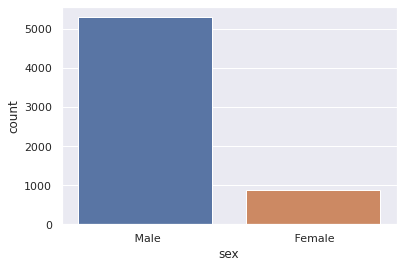

In [ ]:
sns.countplot(x='sex', data=GenderDistdf)

- Male counts are more than female counts in above top 2 qualification of high income individuals.

In [ ]:
GenderDistdf['sex'].value_counts()

 Male      5302
 Female     880
Name: sex, dtype: int64

#Based on the above, what would you recommend the Marketing Team for the following points ?#

#What should be the typical job played by the main characters in the advertisements ?

- Other service and Adm- clerical are the job should play by main characters.
- Males and Females approximatly equal chance of playing this role.
- singles should play this role.

#Which country should the characters portray in their roles ?#

- United states and mexico country should portray in their roles.

#Should there be more men or women in the advertisements ?#

- ther should be more men in the advertisements but as per the data men and womens are approximately equal chance of getting advetisements.

#Should the characters be shown to have a family ?

- No, as there are more number of singles are present, characters should not shown to have family.

#Which Institutions should the Marketing team concentrate on ?#

- Bachelores and Elementry schooling are the institutes marketing team should concertrate more on. because these are the top 2 education qualifications.